<h2>Image Enhacement Using fuzzy logic

<h3>Importing Libraries

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<h3>Reading Target image for Enhancement 

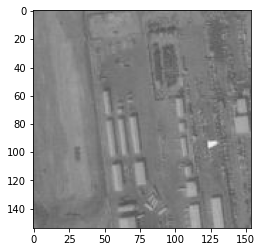

In [17]:
rgb = cv.imread('image.jpg', cv.IMREAD_UNCHANGED)
plt.imshow(rgb)
plt.show()

<h3>1- Converting the image to HSV

In [18]:
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)

<h3>2- Calculating the histogram from the V component

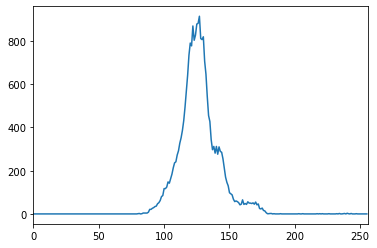

In [19]:
hist = cv.calcHist([hsv], [2], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

<h3>3- Initializing Control Parameter</h3>
Initializing K as 128 <br>
Initializing E as 255 <br>
Calculating M using equation 1

In [20]:
K = 128
E = 255
M = 0

hist_list = [j[0] for j in hist]
numerator = 0
denominator = sum(hist_list)
for i, j in zip(hist_list, range(0, 256)):
    numerator = numerator + i * j
M = int(numerator / denominator)
    
print('K = ' + str(K))
print('E = ' + str(E))
print('M = ' + str(M))

K = 128
E = 255
M = 126


<h3>4- Divide pixel values into 2 classes C1 [0, M-1] and C2[M,255]

In [21]:
C1 = range(0, M)
print('Class 1 = ' + str(C1))

C2 = range(M, 256)
print('Class 2 = ' + str(C2))

Class 1 = range(0, 126)
Class 2 = range(126, 256)


<h3>5- Calculate fuzzy membership values muC1 and muC2 using equations 2 and 4 
 & Calculate the enhanced intensity values using equations 3 and 5

In [27]:
def enhance(X):
    if X in C1:
        # Equation 2
        muC1 = (1 - (M - X)) / M
        # Equation 3
        X = X + (muC1 * K)
        if X < 0:
            X = 0
    elif X in C2:
        # Equation 4
        muC2 = (E - X) / (E - M)
        # Equation 5
        X = (X * muC2) + (E - (muC2 * K)) - K
        if X > 255:
            X = 255
    return X

<h3>6- Combine Hue and Saturation with the V component for Enhanced HSV image

In [28]:
enhanced_V = np.vectorize(enhance)(hsv[:, :, 2])
enhanced_hsv = hsv
enhanced_hsv[:, :, 2] = enhanced_V

<h3>7- Convert Image to RGB for Enhanced RGB Image

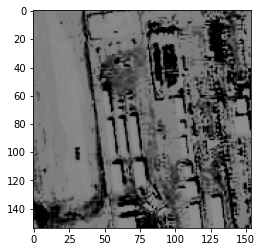

In [36]:
enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)
plt.imshow(enhanced_rgb)
plt.show()